# Aplicação do algoritmo *Apriori* para análise de cestas de mercado e identificação de regras de associação

Em certos setores da economia, como no varejo, existem alguns desafios, por exemplo, conseguir identificar o comportamento do consumidor. Não é possível prever o futuro, mas é possível olhar para o comportamento passado e tentar estipular como será o comportamento dos consumidores daqui para frente. Uma dessas forma é analisando a **cesta de mercado** do consumidor, que nada mais é que o conjunto de itens comprados pelo consumidor em determinado período. Analisar cestas de mercado permite identificar possíveis decisões de compras futuras de bens que estão associados a outros bens. O objetivo é identificar padrões de compra e de preferências e identificar a probabilidade de certo bem ser comprado dado que outro foi comprado, a partir da coleta e análise de dados.

A principal vantagem dessa técnica de análise de dados é o *insights* que podem ser extraídos, permitindo uma melhor alocação de produtos para maximizar as compras. Um exemplo disso é que muitas compras são feitas por impulso e muitos supermecados, em seus caixas, colocam certos produtos (chocolates, guloseimas, salgadinhos, etc) para gerar esse impulso de compra nos consumidores. Outro exemplo clássico é de fraldas-cerveja: em um supermecado nos EUA foi identificado que quem compra fraldas para os filhos também compra cerveja; então o gestor do supermercado realocou esses produtos para que tivesse uma maior proximidade, então houve um aumento na venda desses produtos.

Um dos grandes desafios é o número de dados : se o número de produtos for pequeno a associação entre os bens pode ser feita sem muitos problemas, mas a medida que o *mix* de produtos aumenta não torna-se tão trivial identificar as regras. Por esse motivo são necessárias técnicas matemáticas e estatísticas como ferramentas de análise de dados.

Nesse projeto utilizaremos uma algoritmo de regras de associação para identificar a relação entre os itens de cestas.

## Dados

São cerca de 9001 cestas de mercado, com uma grande variedade de itens. Essa base de dados pode ser acessada [aqui](https://www.kaggle.com/apmonisha08/market-basket-analysis).

## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from apyori import apriori

## Importando a base de dados

In [2]:
cestas = pd.read_csv('Groceries.csv',header=None)

Abaixo vemos as 5 primeiras linhas da nossa base de dados.

In [3]:
cestas.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


E as 5 últimas linhas.

In [4]:
cestas.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
8997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,female sanitary products,hygiene articles,napkins,house keeping products,NaN,NaN,NaN


Dimnesão da nossa base de dados.

In [5]:
cestas.shape

(9002, 32)

Informações sobre o *dataset*.

In [6]:
cestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7834 non-null   object
 1   1       6107 non-null   object
 2   2       4787 non-null   object
 3   3       3773 non-null   object
 4   4       2972 non-null   object
 5   5       2293 non-null   object
 6   6       1774 non-null   object
 7   7       1348 non-null   object
 8   8       977 non-null    object
 9   9       693 non-null    object
 10  10      508 non-null    object
 11  11      371 non-null    object
 12  12      276 non-null    object
 13  13      215 non-null    object
 14  14      156 non-null    object
 15  15      110 non-null    object
 16  16      72 non-null     object
 17  17      48 non-null     object
 18  18      38 non-null     object
 19  19      26 non-null     object
 20  20      20 non-null     object
 21  21      14 non-null     object
 22  22      11 non-null     

Valores faltantes.

Temos muito *missing values*, mas isso não será um problema para a aplicação do algoritmo.

In [7]:
cestas.isna().sum()

0     1168
1     2895
2     4215
3     5229
4     6030
5     6709
6     7228
7     7654
8     8025
9     8309
10    8494
11    8631
12    8726
13    8787
14    8846
15    8892
16    8930
17    8954
18    8964
19    8976
20    8982
21    8988
22    8991
23    8996
24    8996
25    8995
26    8996
27    8997
28    8998
29    9001
30    9001
31    9001
dtype: int64

Vamos agora criar um *dataframe* que com todos os valores da nossa base de dados contados e somados em uma única coluna e poderemos ver quais os itens mais vendidos.

In [8]:
cestas_soma = pd.DataFrame(cestas.apply(pd.value_counts).T.sum(), columns=['Quantidade'])

Vemos que os 10 produtos mais vendidos são : *whole milk*, *ther vegetables*, *rolls/buns*, *soda*, *yogurt*, *bottled water*, *root vegetables*, *tropical fruit*, *shopping bags* e *sausage*.

In [9]:
cestas_soma.sort_values(by='Quantidade',ascending=False).head(10)

,Quantidade
whole milk,2002.0
other vegetables,1506.0
rolls/buns,1448.0
soda,1390.0
yogurt,1074.0
bottled water,873.0
root vegetables,862.0
tropical fruit,816.0
shopping bags,758.0
sausage,730.0


Abaixo podemos ver de forma gráfica todos os itens vendidos.

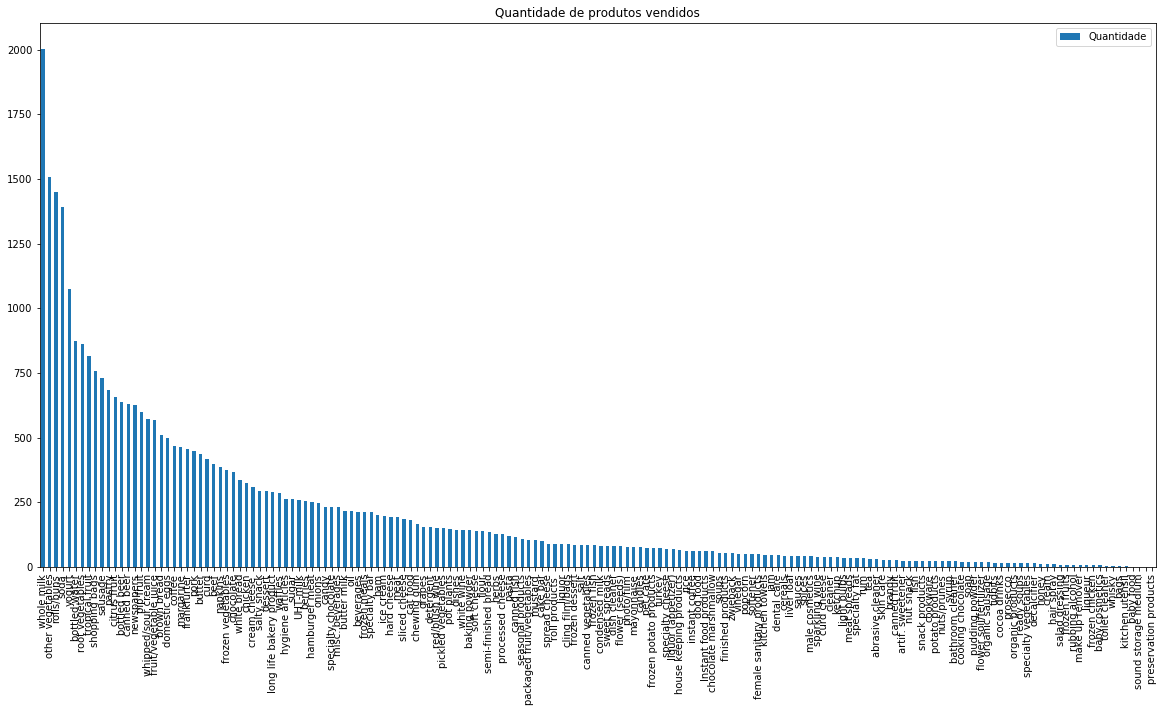

In [10]:
cestas_soma.sort_values(by='Quantidade',ascending=False).plot.bar(figsize=(20,10), title='Quantidade de produtos vendidos');

Aqui os 10 e 20 mais vendidos.

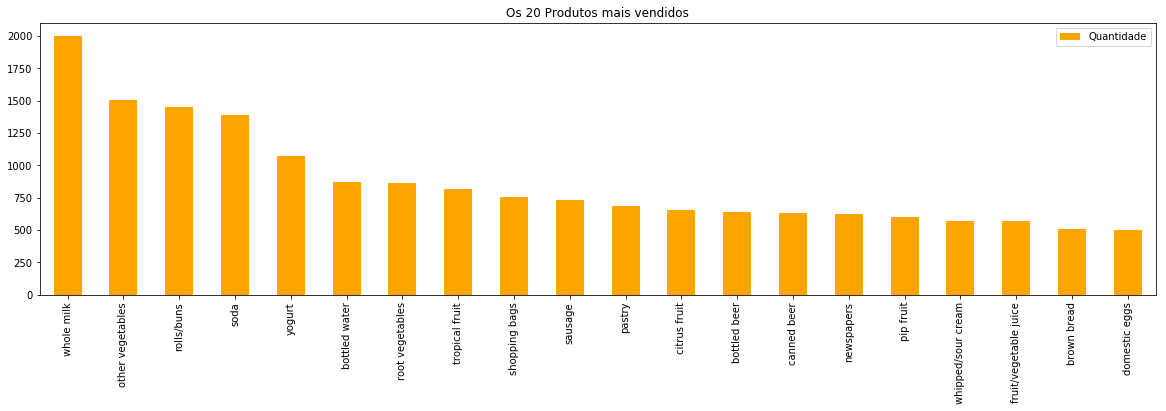

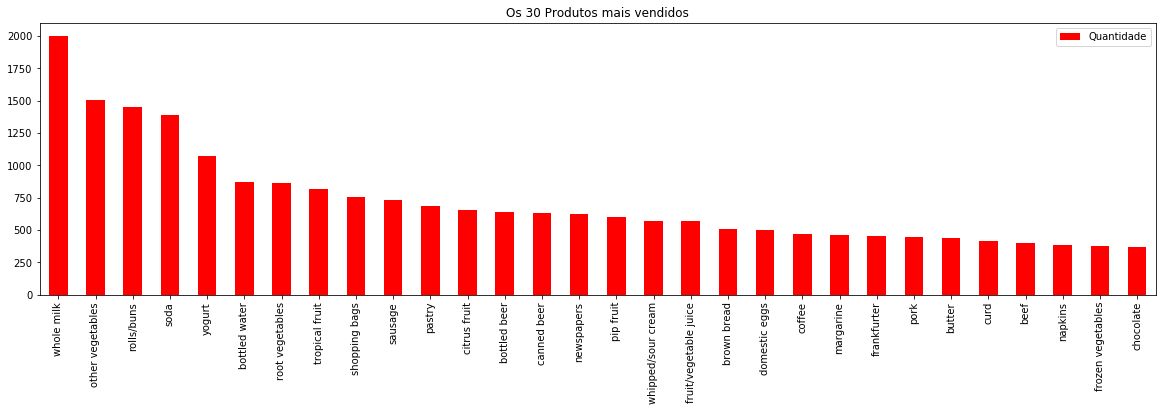

In [11]:
cestas_soma.sort_values(by='Quantidade',ascending=False).head(20).plot.bar(figsize=(20,5), color='orange',
                                                                           title='Os 20 Produtos mais vendidos');

cestas_soma.sort_values(by='Quantidade',ascending=False).head(30).plot.bar(figsize=(20,5), color='red',
                                                                           title='Os 30 Produtos mais vendidos');

Abaixo podemos ver os items menos frequentes nas compras.

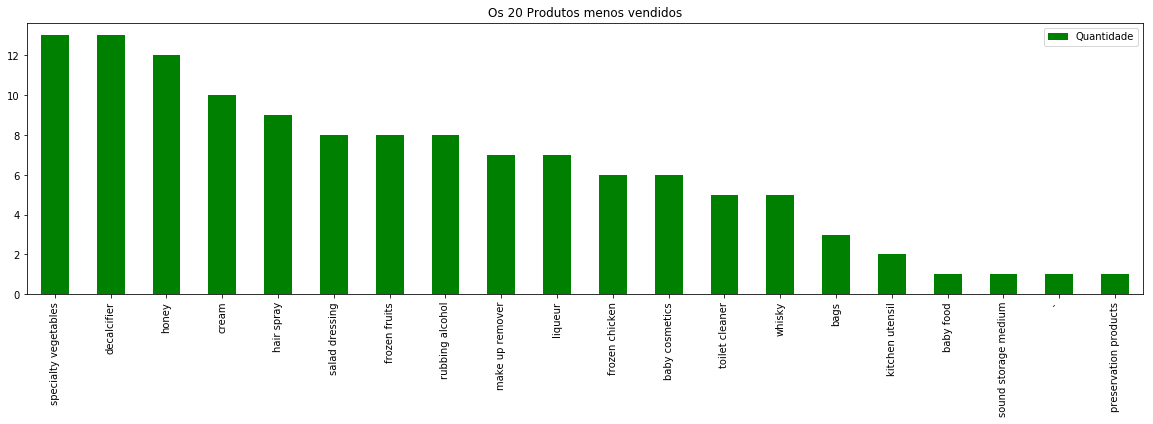

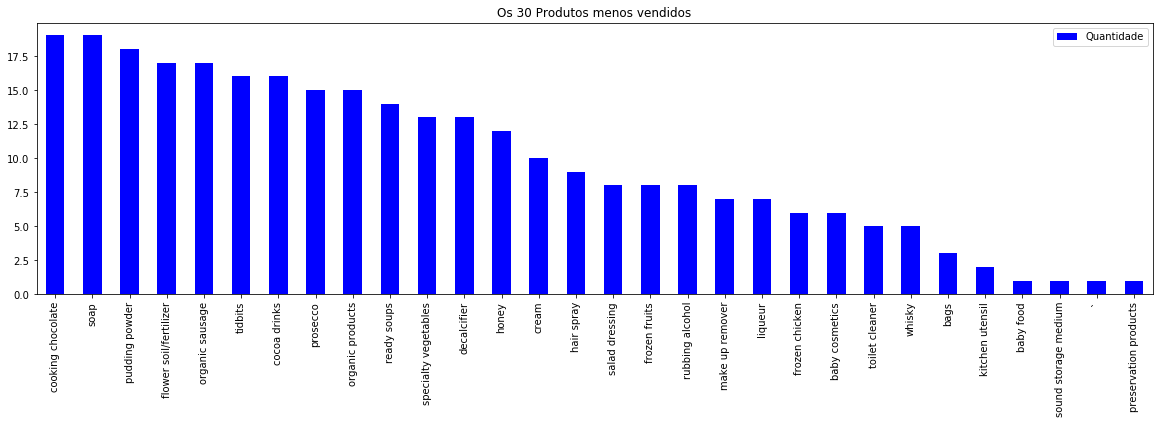

In [12]:
cestas_soma.sort_values(by='Quantidade',ascending=False).tail(20).plot.bar(figsize=(20,5), color='green',
                                                                           title='Os 20 Produtos menos vendidos');

cestas_soma.sort_values(by='Quantidade',ascending=False).tail(30).plot.bar(figsize=(20,5), color='blue',
                                                                           title='Os 30 Produtos menos vendidos');

## Aplicação do Algoritmo *Apriori*

O algoritmo *Apriori* é um método de aprendizado de máquina baseado em regras e trabalha com a ideia de itens mais frequentes, extraindo regras que relacionam esse itens. Esse algoritmo foi projeto para trabalhar em grandes bancos de dados. O *Apriori* é bastante eficar para analisar as cestas de mercado de compras de clientes (principalmente no setor de varejo), mas também está sendo usado na área da saúde para identificação de reações adversas de medicamentos. 

Esse algoritmo utiliza a regra do *SE..., ENTÃO*, como por exemplo: "*SE* pão for comprado, *ENTÃO* café será comprado também". Além disso pode ser dada especificações para as regras por meios de certos parâmetros. O algoritmo *Apriori* utiliza algumas métricas para gerar as regras, que são:

1) **Suporte**: Trata da *popularidade* de um item, ou seja, quantas vezes esse item aparece em nossa base de dados. Quando temos uma base de dados pequena é normal que esse valor seja alta, mas a medida que o conjunto de dados e a variedade de itens aumenta, o valor do suporte tende a diminuir;

2) **Confiança** : Essa métrica indica a probabilidade de compra de um item *Y* dado que o item *X* foi comprado. O mesmo que ocorre com o *suporte* ocorre com essa métrica, quanto mais o *mix* de itens aumenta menor pode ser o valor dessa métrica. Aqui teremos o valor entre 0 e 1;

3) **LIFT** : probabilidade de o item *Y* ser comprado quando o item *X* é comprado, também controlando a popularidade do item *Y*. O valor dessa métrica é acima de 0.

Vamos então aplicar o algortimo *Apriori* para a nossa base de dados, mas antes vamos criar uma lista com os dados.

In [13]:
transacoes=[]
for i in range(0,9002):
    transacoes.append([str(cestas.values[i,j]) for j in range(0,32)])

Abaixo podemos ver como ficaram os dados em formato de lista.

In [14]:
transacoes

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese ',
  'meat spreads',
  'nan

#### Aplicando o algoritmo *Apriori*

Para o suporte (*min_support*) usaremos o valor de 0.003. Esse valor foi escolhido, pois queremos os itens que são comprados pelo menos 4 vezes ao dia durante uma semana e dividimos pelo número total (9002).

A confiança (*min_confidence*) usaremos o valor de 70% (ou seja, a probabilidade de se comprar *Y* dado que *X* foi comprado deve ser de 70% para cima).

O *Lift* mínimo (*min_lift*) será igual a 2, ou seja, dado que se compra *X* a chance de se comprar *Y* deve ser maior igual tantas vezes a que foi definida nesse parâmetro. Ou seja, que pelo menos ao comprar *X* a chance de compra *Y* deve ser 2 vezes.

E, por fim, no *min_lenght* teremos a quantidade mínina de itens que ele vai gerar por regras, ou seja, deve ter pelo menos um item antes do *SE* e outro após o *ENTÃO*.

In [24]:
regras=apriori(transacoes, min_support=0.003,min_confidence=0.7,min_lift=2, min_lenght=2)

Vamos ver os resultado que foram gerados.

In [25]:
resultado=list(regras)
resultado

[RelationRecord(items=frozenset({'whole milk', 'cream cheese ', 'domestic eggs'}), support=0.0033325927571650742, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cream cheese ', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7142857142857142, lift=3.2117882117882113)]),
 RelationRecord(items=frozenset({'curd', 'whole milk', 'domestic eggs'}), support=0.004443457009553432, ordered_statistics=[OrderedStatistic(items_base=frozenset({'curd', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7142857142857142, lift=3.2117882117882113)]),
 RelationRecord(items=frozenset({'whole milk', 'sugar', 'domestic eggs'}), support=0.0034436791824039104, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sugar', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7045454545454546, lift=3.1679910998092815)]),
 RelationRecord(items=frozenset({'other vegetables', 'whole milk', 'butter', 'whipped/sour cream'}), support=0.003776938

Como está tudo bagunçado podemos organizar melhor essa saída.

In [26]:
resultado2=[list(x) for x in resultado]
resultado2

[[frozenset({'cream cheese ', 'domestic eggs', 'whole milk'}),
  0.0033325927571650742,
  [OrderedStatistic(items_base=frozenset({'cream cheese ', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7142857142857142, lift=3.2117882117882113)]],
 [frozenset({'curd', 'domestic eggs', 'whole milk'}),
  0.004443457009553432,
  [OrderedStatistic(items_base=frozenset({'curd', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7142857142857142, lift=3.2117882117882113)]],
 [frozenset({'domestic eggs', 'sugar', 'whole milk'}),
  0.0034436791824039104,
  [OrderedStatistic(items_base=frozenset({'sugar', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7045454545454546, lift=3.1679910998092815)]],
 [frozenset({'butter',
             'other vegetables',
             'whipped/sour cream',
             'whole milk'}),
  0.0037769384581204176,
  [OrderedStatistic(items_base=frozenset({'other vegetables', 'butter', 'whipped/sour cream'}), items_ad

Vemos que temos 20 regras de associação que foram identificadas pelo algoritmo *Apriori*.

In [28]:
len(resultado2)

20

Ainda não estão nítidos os resultados, vamos *puxar* as 7 principais regras de associação geradas pelo modelo.

In [32]:
reg_associadas=[]
for j in range(0,20):
    reg_associadas.append([list(x) for x in resultado2[j][2]])

E abaixo vemos as 20 regras principais.

In [33]:
reg_associadas

[[[frozenset({'cream cheese ', 'domestic eggs'}),
   frozenset({'whole milk'}),
   0.7142857142857142,
   3.2117882117882113]],
 [[frozenset({'curd', 'domestic eggs'}),
   frozenset({'whole milk'}),
   0.7142857142857142,
   3.2117882117882113]],
 [[frozenset({'domestic eggs', 'sugar'}),
   frozenset({'whole milk'}),
   0.7045454545454546,
   3.1679910998092815]],
 [[frozenset({'butter', 'other vegetables', 'whipped/sour cream'}),
   frozenset({'whole milk'}),
   0.7234042553191489,
   3.2527897634280607]],
 [[frozenset({'butter', 'other vegetables', 'yogurt'}),
   frozenset({'whole milk'}),
   0.7346938775510204,
   3.303553589267875]],
 [[frozenset({'citrus fruit', 'root vegetables', 'tropical fruit'}),
   frozenset({'other vegetables'}),
   0.8,
   4.781938911022577]],
 [[frozenset({'cream cheese ', 'domestic eggs', 'nan'}),
   frozenset({'whole milk'}),
   0.7073170731707317,
   3.1804536926488143]],
 [[frozenset({'curd', 'domestic eggs', 'nan'}),
   frozenset({'whole milk'}),
   0

## Conclusão

Abaixo podemos ver uma tabela com as regras de associação, seus itens comprados, a confiança e o *lift*. A maioria das regras mostra que as compras ocorreram e o item que acompanha é o *whole milk* (ou leite integral) e depois *other vegetables* (outros vegetais). Também há muitas regras repetidas, isso ocorreu por conta da dos valores faltantes *NaN*. Também vemos que a confiança (probabilidade) em todas as regras estão acima dos 70% que definimos e a regra com maior confiança foi a regra 6, além do maior *lift*.

Uma das estratégia que poderiam ser implementadas seria colocar próximo os produtos *yogurt*, *domestic eggs* e *butter* do *whole milk* e os *root vegetables* dos *other vegetables*.

|          ||  Itens *X*  ||   Item *Y*   ||    Confiança    ||     *Lift*      ||
|:--------:||:-----------:||:------------:||:---------------:||:---------------:||
|Regra 1   || *cream cheese* e *domestic eggs*  ||  *whole milk*||   0.71428    ||       3.2117    ||
|Regra 2   ||*curd* e *domestic eggs*      ||  *whole milk*      ||  0.71428       ||     3.2117       ||
|Regra 3   || *domestic eggs* e *sugar*      || *whole milk*      ||   0.7045       ||       3.1679       ||
|Regra 4   || *butter*, *other vegetables* e *whipped/sour cream*   || *whole milk*    || 0.723404 ||  3.2527  ||
|Regra 5   || *butter*, *other vegetables* e *yogurt*  ||  *whole milk*  ||  0.73469  ||      3.3035       ||
|Regra 6   || *citrus fruit*, *root vegetables* e *tropical fruit* ||  *other vegetables*  ||  0.8 || 4.7819  ||
|Regra 7   ||*cream cheese* e *domestic eggs*      || *whole milk* ||    0.70731  ||    3.1804    ||
|Regra 8   || *curd* e *domestic eggs*       || *whole milk*  ||    0.70909 ||   3.1884    ||
|Regra 9   || *curd*, *tropical fruit* e *yogurt*  || *whole milk*  ||  0.78048   ||   3.5094  ||
|Regra 10  || *root vegetables*, *tropical fruit* e *whipped/sour cream* ||  *other vegetables* ||  0.7179 || 4.2914  ||
|Regra 11  || *root vegetables*, *tropical fruit* e *yogurt* ||  *whole milk*  ||  0.73529   ||   3.3062 ||
|Regra 12  || *tropical fruit*, *whipped/sour cream* e *yogurt* ||  *whole milk* ||  0.73076  ||  3.2859 ||
|Regra 13  || *butter*, *other vegetables* e *whipped/sour cream* || *whole milk* || 0.70212 ||   3.1586 ||
|Regra 14  || *butter*, *other vegetables* e  *yogurt* ||  *whole milk*  ||  0.714285 ||  3.21339 ||
|Regra 15  || *citrus fruit*, *root vegetables* e *tropical fruit* || *other vegetables* ||  0.77777 ||  4.6521||
|Regra 16  || *curd*, *tropical fruit* e *yogurt* ||  *whole milk*  ||  0.75609 || 3.4014  ||
|Regra 17  || *root vegetables*, *tropical fruit* e *yogurt*  || *whole milk* || 0.72058 || 3.2417  ||
|Regra 18  || *tropical fruit*, *whipped/sour cream* e *yogurt*   || *whole milk* ||0.71153 ||3.20103 ||
|Regra 19  || *other vegetables*, *root vegetables*, *tropical fruit* e *yogurt*  || *whole milk*|| 0.76190 ||3.4259 ||
|Regra 20  || *other vegetables*, *root vegetables*, *tropical fruit* e *yogurt*  || *whole milk*|| 0.73809 || 3.32050 ||